<a href="https://colab.research.google.com/github/hetvidobariya30/Sentiment-Analysis/blob/main/SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Important Libraries

In [73]:
# Basic Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import zipfile
import os

# NLP Libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

#Load the Dataset

In [74]:
from google.colab import files
uploaded = files.upload()

Saving Flipkart Product reviews with sentiment Dataset.csv.zip to Flipkart Product reviews with sentiment Dataset.csv (1).zip


In [75]:
df = pd.read_csv("Flipkart Product reviews with sentiment Dataset.csv.zip")

In [76]:
display(df.head())

,product_name,product_price,Rate,Review,Summary,Sentiment
0,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,super!,great cooler excellent air flow and for this p...,positive
1,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,5,awesome,best budget 2 fit cooler nice cooling,positive
2,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,the quality is good but the power of air is de...,positive
3,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,1,useless product,very bad product its a only a fan,negative
4,Candes 12 L Room/Personal Air Cooler??????(Whi...,3999,3,fair,ok ok product,neutral


In [77]:
print("Dataset Shape: ",df.shape)
print("\nColumns: ",df.columns)
display(df.info())

Dataset Shape:  (205052, 6)

Columns:  Index(['product_name', 'product_price', 'Rate', 'Review', 'Summary',
       'Sentiment'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   product_name   205052 non-null  object
 1   product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB


None

#Sentimental Analysis

In [78]:
df = df[["Review","Sentiment"]]
df.dropna(inplace=True)
display(df.head())

,Review,Sentiment
0,super!,positive
1,awesome,positive
2,fair,positive
3,useless product,negative
4,fair,neutral


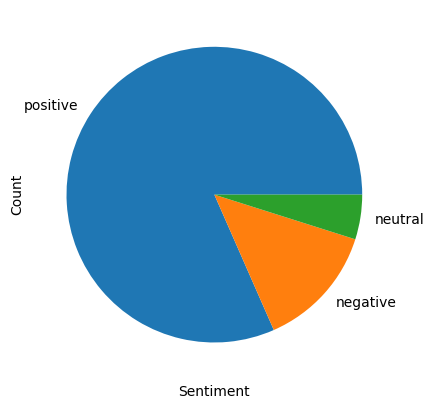

,count
Sentiment,
positive,147176
negative,24401
neutral,8811


In [79]:
plt.figure()
df['Sentiment'].value_counts().plot(kind='pie')
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()
df['Sentiment'].value_counts()

#Text Processing

In [80]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text


In [81]:
df['Clean_Review'] = df['Review'].apply(clean_text)
df.head()

,Review,Sentiment,Clean_Review
0,super!,positive,super
1,awesome,positive,awesome
2,fair,positive,fair
3,useless product,negative,useless product
4,fair,neutral,fair


#Feature Extraction using TF-IDF

In [82]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X = vectorizer.fit_transform(df['Clean_Review'])
Y = df['Sentiment']
print("Feature Matrix Shape:", X.shape)

Feature Matrix Shape: (180388, 1127)


#Model Trainig

In [83]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Training Data:", X_train.shape)
print("Testing Data:", X_test.shape)

Training Data: (144310, 1127)
Testing Data: (36078, 1127)


In [84]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

#Model Prediction

In [85]:
Y_pred = model.predict(X_test)

In [86]:
accuracy = accuracy_score(Y_test, Y_pred)
print("Model Accuracy:", accuracy)

Model Accuracy: 0.9108875214812351


In [87]:
print("\nClassification Report:\n")
print(classification_report(Y_test, Y_pred))


Classification Report:

              precision    recall  f1-score   support

    negative       0.85      0.75      0.80      4735
     neutral       0.00      0.00      0.00      1761
    positive       0.92      0.99      0.95     29582

    accuracy                           0.91     36078
   macro avg       0.59      0.58      0.58     36078
weighted avg       0.87      0.91      0.89     36078



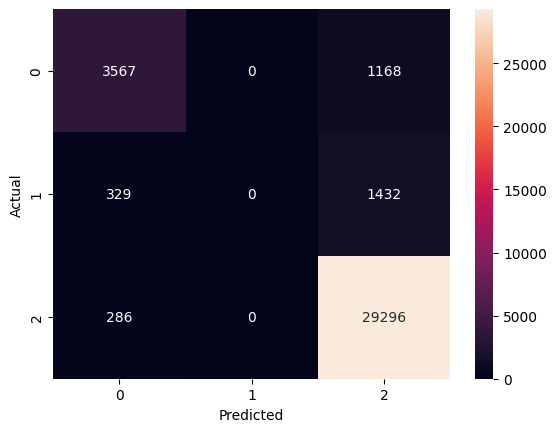

In [88]:
cm = confusion_matrix(Y_test, Y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#Sample Prediction

In [89]:
sample_reviews = ["This product is amazing and works perfectly","Very bad quality and waste of money","Meadium Product"]
sample_clean = [clean_text(review) for review in sample_reviews]
sample_vector = vectorizer.transform(sample_clean)
predictions = model.predict(sample_vector)

for review, sentiment in zip(sample_reviews, predictions):
    print(f"Review: {review}")
    print(f"Predicted Sentiment: {sentiment}")
    print("-------------")

Review: This product is amazing and works perfectly
Predicted Sentiment: positive
-------------
Review: Very bad quality and waste of money
Predicted Sentiment: negative
-------------
Review: Meadium Product
Predicted Sentiment: positive
-------------


#Conclusion

In [90]:
1. Most reviews in the dataset are positive.
2. Logistic Regression achieved approximately 91% accuracy.
3. TF-IDF effectively converted text data into numerical features.
4. The model performs well for positive sentiment but can be improved for neutral class.
5. Future improvements include balancing the dataset and using deep learning models like LSTM.

SyntaxError: invalid syntax (ipython-input-2685109328.py, line 1)